# K-means clustering
Pamela Sánchez Arellano A01636995


In [114]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/TC1002S/NotebooksStudents/A01636995"

else:
    # Define path del proyecto
    Ruta            = "/Users/pamelasanchez/Documents/TC1002S/NotebooksStudents/A01636995"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [121]:
# Dataset url
url = Ruta + "/datasets/iris/iris.csv"

# Load the dataset
df  = df = pd.read_csv(url, header = None)
# Column names are added to facilitate the rest of the work
df = df.rename(columns={0: "Largo_Sepalo"})
df = df.rename(columns={1: "Ancho_Sepalo"})
df = df.rename(columns={2: "Largo_Petalo"})
df = df.rename(columns={3: "Ancho_Petalo"})
df = df.rename(columns={4: "Especie"})

In [116]:
# Get a general 'feel' of the data
# Print the dataframe
df

,Largo_Sepalo,Ancho_Sepalo,Largo_Petalo,Ancho_Petalo,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
# get the number of observations and variables
df.shape

(150, 5)

In [93]:
# Drop rows with NaN values if existing
df.dropna()
# Print the new shape
df.shape

(150, 5)

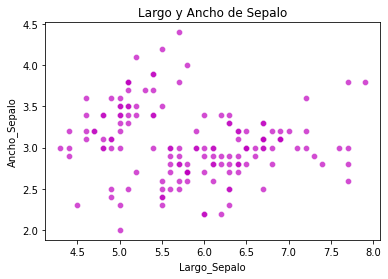

In [31]:
# Scatterplot of x1 and x2
sns.scatterplot(data = df, x = "Largo_Sepalo", y = "Ancho_Sepalo", c = "m", alpha = 0.7)
plt.title("Largo y Ancho de Sepalo")
plt.show()

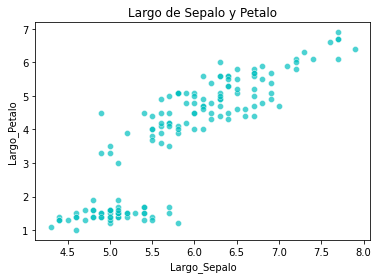

In [32]:
# Scatterplot of x1 and x3
sns.scatterplot(data = df, x = "Largo_Sepalo", y = "Largo_Petalo", c = "c", alpha = 0.7)
plt.title("Largo de Sepalo y Petalo")
plt.show()

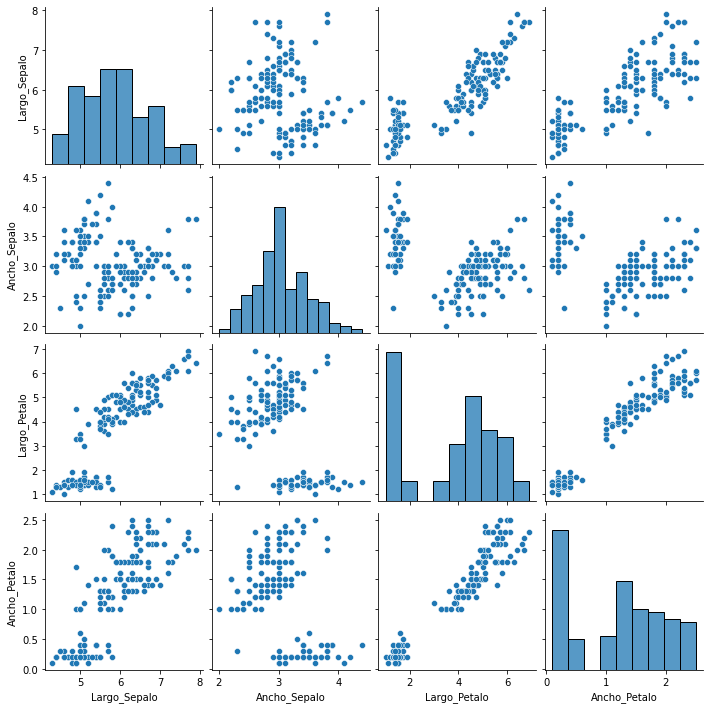

In [33]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df)
plt.show()

In [122]:
# The last column is dropped 
df.drop("Especie", axis=1, inplace = True)
df

,Largo_Sepalo,Ancho_Sepalo,Largo_Petalo,Ancho_Petalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Kmeans clustering


In [95]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  2# Let's assume there are 2,3,4,5...? clusters/groups

km = KMeans(n_clusters = K, n_init = "auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [96]:
# Add a new column to the dataset with the cluster information
df.insert(4, "Cluster_Information", yestimated, True)
df.head()

,Largo_Sepalo,Ancho_Sepalo,Largo_Petalo,Ancho_Petalo,Cluster_Information
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
# Label of the estimated clusters
df.Cluster_Information.unique()

array([0, 1], dtype=int32)

In [98]:
# Cluster centroides
km.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [99]:
# Sum of squared error (sse) of the final model
km.inertia_

152.3479517603579

In [100]:
# The number of iterations required to converge
km.n_iter_

4

# Plot estimated clusters


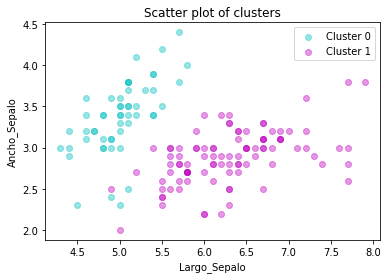

In [101]:
# Get a dataframe with the data of each clsuter
df1 = df[df.Cluster_Information == 0]
df2 = df[df.Cluster_Information == 1]

# Scatter plot of each cluster
plt.scatter(df1.Largo_Sepalo, df1.Ancho_Sepalo, label = "Cluster 0", c = 'c', marker = 'o', alpha = 0.4)
plt.scatter(df2.Largo_Sepalo, df2.Ancho_Sepalo, label = "Cluster 1", c = 'm', marker = 'o', alpha = 0.4)

plt.title("Scatter plot of clusters")
plt.xlabel("Largo_Sepalo")
plt.ylabel("Ancho_Sepalo")
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [42]:
# Intialize a list to hold sum of squared error (sse)
sse = []
# Define values of k
kNew = range(1,10)
# For each k
for i in kNew:
  km = KMeans(n_clusters = i, n_init = "auto")
  km.fit_predict(df[["Largo_Sepalo", "Ancho_Sepalo"]])
  sse.append(km.inertia_)

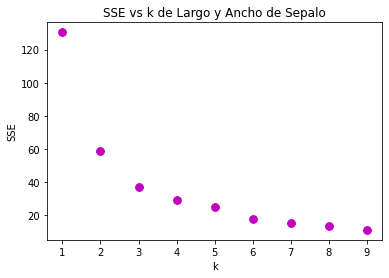

In [43]:
# Plot sse versus k
plt.scatter(kNew, sse, c = "m", s = 60)
plt.title("SSE vs k de Largo y Ancho de Sepalo")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

Choose the k after which the sse is minimally reduced. Based on this analysis, it seem that the best k is 3.


<span style='color:Blue'> **Important remarks**  </span>

- Observations?
The use of scatter plot is helpful in ML analysis and to choose the best k for the clusters.


# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

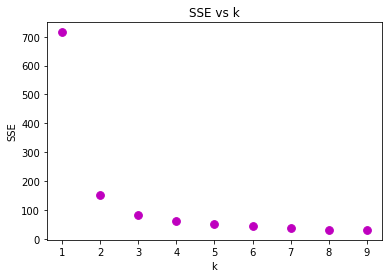

In [44]:
# Repeat the analysis using all six features
sse = []
# Define values of k
kNew = range(1,10)
# For each k
for i in kNew:
  km = KMeans(n_clusters = i, n_init = "auto")
  km.fit_predict(df)
  sse.append(km.inertia_)
  # Plot sse versus k
plt.scatter(kNew, sse, c = "m", s = 60)
plt.title("SSE vs k")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

# Conclusion
As seen above, when the SSE is obtained considering all features, the best k is 2. However, when looking at this analysis only from the perspective of two individual features, this answer changes, as seen previusly. 

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics**


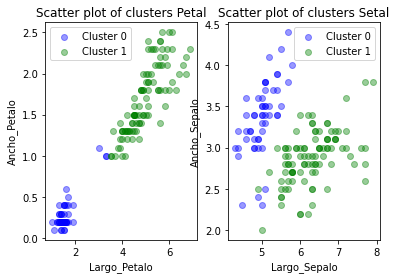

In [124]:
# 1.
# Making the clusters
df.drop("Cluster_Information", axis = 1)

K  =  2
km = KMeans(n_clusters = K, n_init = "auto")
yestimated = km.fit_predict(df)
df.insert(4, "Cluster", yestimated, True)
# Scatter plot of each cluster on Petal
plt.subplot(1,2,1)
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
plt.scatter(df1.Largo_Petalo, df1.Ancho_Petalo, label = "Cluster 0", c = 'b', marker = 'o', alpha = 0.4)
plt.scatter(df2.Largo_Petalo, df2.Ancho_Petalo, label = "Cluster 1", c = 'g', marker = 'o', alpha = 0.4)
plt.title("Scatter plot of clusters Petal")
plt.xlabel("Largo_Petalo")
plt.ylabel("Ancho_Petalo")
plt.legend()
# Scatter plot of each cluster on Setal
plt.subplot(1,2,2)
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
plt.scatter(df1.Largo_Sepalo, df1.Ancho_Sepalo, label = "Cluster 0", c = 'b', marker = 'o', alpha = 0.4)
plt.scatter(df2.Largo_Sepalo, df2.Ancho_Sepalo, label = "Cluster 1", c = 'g', marker = 'o', alpha = 0.4)
plt.title("Scatter plot of clusters Setal")
plt.xlabel("Largo_Sepalo")
plt.ylabel("Ancho_Sepalo")
plt.legend()
plt.show()

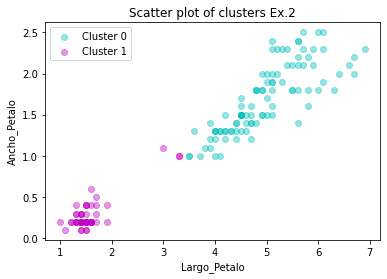

In [126]:
# 2.
df.drop("Cluster", axis = 1)
df20 = df.drop(["Largo_Sepalo", "Ancho_Sepalo"], axis = 1)
# Making the clusters
K  =  2
km = KMeans(n_clusters = K, n_init = "auto")
yestimated = km.fit_predict(df20)
df20.insert(2, "Cluster_Information", yestimated, True)
# Scatter plot of each cluster
df1 = df20[df20.Cluster_Information == 0]
df2 = df20[df20.Cluster_Information == 1]
plt.scatter(df1.Largo_Petalo, df1.Ancho_Petalo, label = "Cluster 0", c = 'c', marker = 'o', alpha = 0.4)
plt.scatter(df2.Largo_Petalo, df2.Ancho_Petalo, label = "Cluster 1", c = 'm', marker = 'o', alpha = 0.4)

plt.title("Scatter plot of clusters Ex.2")
plt.xlabel("Largo_Petalo")
plt.ylabel("Ancho_Petalo")
plt.legend()
plt.show()

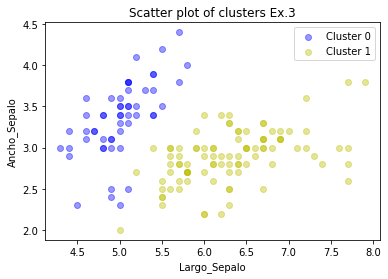

In [128]:
# 3.
df.drop("Cluster", axis = 1)
df30 = df.drop(["Largo_Petalo", "Ancho_Petalo"], axis = 1)
# Making the clusters
K  =  2
km = KMeans(n_clusters = K, n_init = "auto")
yestimated = km.fit_predict(df30)
df30.insert(2, "Cluster_Information", yestimated, True)
# Scatter plot of each cluster
df1 = df30[df30.Cluster_Information == 0]
df2 = df30[df30.Cluster_Information == 1]
plt.scatter(df1.Largo_Sepalo, df1.Ancho_Sepalo, label = "Cluster 0", c = 'b', marker = 'o', alpha = 0.4)
plt.scatter(df2.Largo_Sepalo, df2.Ancho_Sepalo, label = "Cluster 1", c = 'y', marker = 'o', alpha = 0.4)

plt.title("Scatter plot of clusters Ex.3")
plt.xlabel("Largo_Sepalo")
plt.ylabel("Ancho_Sepalo")
plt.legend()
plt.show()